In [1]:
import os

In [2]:
# use GPU 1
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
IMAGES_DIR = '/d2/caches/kaggle-planet/processed-images-64x64'
IMAGE_SHAPE = (64, 64, 4)
TEST_TIFFS_DIR = '/datasets/kaggle/planet/test-tif-v2'
MODEL = '/d2/caches/kaggle-planet/models/A/e09-l=0.22781-vl=0.28093.h5'
BATCH_SIZE = 16

In [4]:
%run 'Lib.ipynb'

In [5]:
import keras

Using TensorFlow backend.


In [6]:
test_mapping = pd.read_csv('/datasets/kaggle/planet/test_v2_file_mapping.csv', index_col='old')

In [7]:
X_files_pred = [x.split('.')[0] for x in list_files(TEST_TIFFS_DIR)]

In [17]:
# number of batches for prediction
import math
N_BATCHES = int(math.ceil(float(len(X_files_pred)) / float(BATCH_SIZE)))

In [8]:
model = keras.models.load_model(MODEL)

In [9]:
def predict_generator():

    batch_index = -1

    while True:
        
        batch_index += 1
        
        yield generate_batch(
            n_samples=BATCH_SIZE,
            batch_index=batch_index,
            X_files=X_files_pred,
            Y_tags_misc=None,
            Y_tags_weather=None,
            images_dir=IMAGES_DIR,
            image_shape=IMAGE_SHAPE)

In [32]:
p = model.predict_generator(
    predict_generator(),
    steps=1,
    max_q_size=10,
    workers=1,
    pickle_safe=False,
    verbose=1)

1/1 [==============================] - 0s


In [46]:
p_misc = p[0]
p_weather = p[1]

In [78]:
ix = 5

In [79]:
img = np.fromfile(IMAGES_DIR + '/' + X_files_pred[ix], dtype=np.float32).reshape(IMAGE_SHAPE)

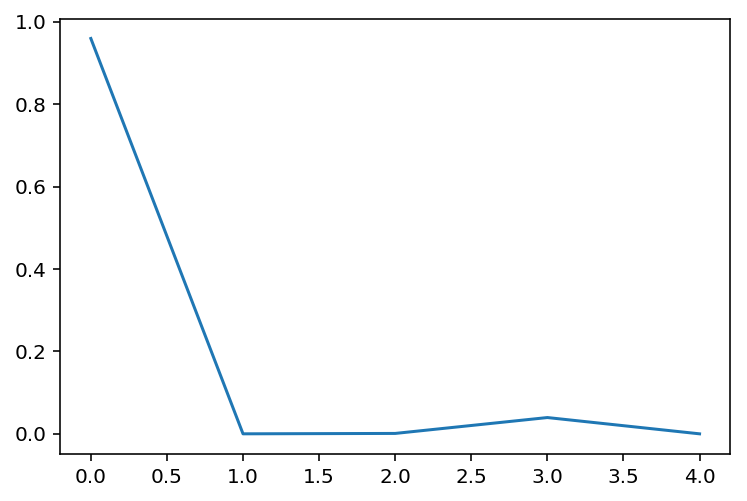

In [80]:
plt.plot(p_weather[0][ix])

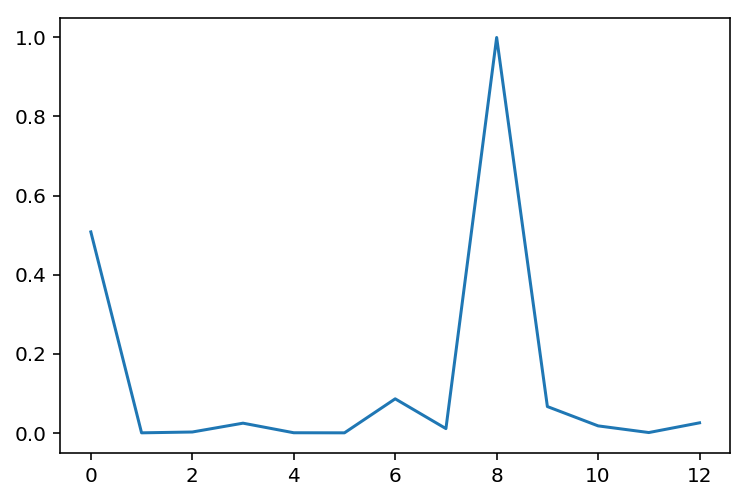

In [81]:
plt.plot(p_misc[0][ix])

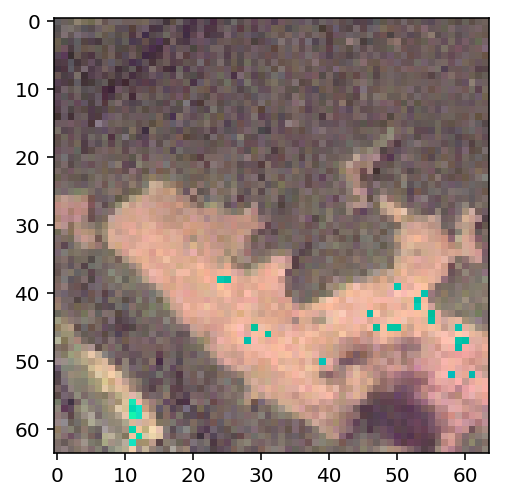

In [82]:
plt.imshow(img[:,:,:3])

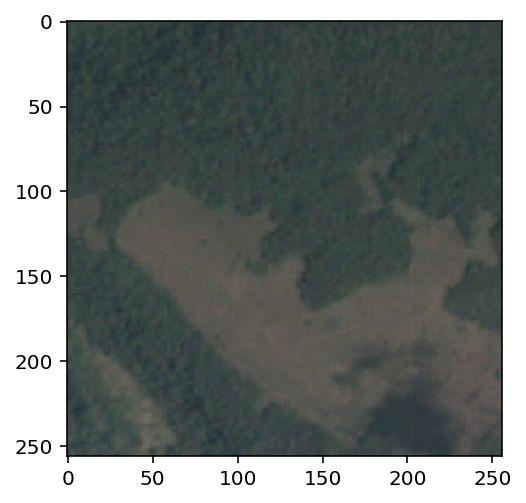

In [83]:
plt.imshow(plt.imread('/datasets/kaggle/planet/test-jpg/' + X_files_pred[ix] + '.jpg'))